In [80]:
import numpy as np
import matplotlib.pyplot as plt

import random

import time

In [81]:
# define a generator function for the polynomial
def generator_function(x,*par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

In [82]:
def find_roots(window,n_roots_expected):
    
    xroots = []
    yroots = []

    n_roots_found = 0

    n = 0

    while (n_roots_found < n_roots_expected):

        diff = 1.0E12
        epsilon = 1.0E-7

        xc = np.random.uniform(xl,xh)
        xa = xc - window/2.0
        xb = xc + window/2.0

        fa = generator_function(xa,*par)
        fb = generator_function(xb,*par)

        #print (xc,xa,xb,fa,fb)

        if (fa*fb > 0):
            #print ('here 1')
            n += 1
        else:
            #print ('here 2')
            while (diff > epsilon and n<10000):
                xc = (xb-xa)/2.0+xa
                fc = generator_function(xc,*par)
    
                if (fa*fc < 0):
                    xb = xc
                    fb = generator_function(xb,*par)
                    diff = np.abs(fc-fa)
                else:
                    xa = xc
                    fa = generator_function(xa,*par)
                    diff = np.abs(fc-fb)
            
                n += 1

            already_found = False
            if n_roots_found > 0:
                for xroot in xroots:
                    if (np.fabs(xroot-xc) < 5.0*epsilon):
                        already_found = True
            
            if (not already_found):
                n_roots_found += 1
                xroots.append(xc)
                yroots.append(fc)
    
    return n,xroots,yroots
       

In [87]:
# Set the x limits, and the number of points, calculate the interval, and set the function parameters
xl = -4.0
xh = 4.0
npoints = 10000

dx = (xh-xl)/npoints

par = np.array([1.80,-4.05,0.4,1.0])

n, xroots, yroots = find_roots(0.5,3)
print (n,xroots,yroots)

271 [1.499999995595375, -2.399999998215817, 0.5000000204119006] [-1.7178037658993617e-08, 2.0179111714924147e-08, -5.9194510959592606e-08]


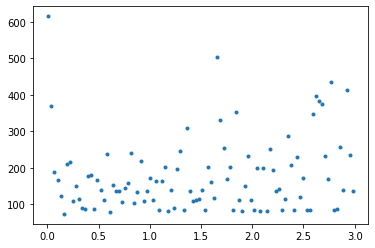

In [88]:
xwin = []
nwin = []

for i in range(100):
    window = 0.01 + i/100.0*3.0
    n,xroots,yroots = find_roots(window,3)
    xwin.append(window)
    nwin.append(n)
    
plt.plot(xwin,nwin,'.')

152.564 0.0152564


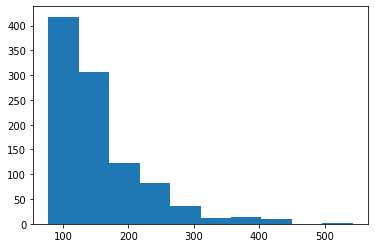

In [89]:
nstat = []

for i in range(1000):
    n,xroots,yroots = find_roots(1.0,3)
    nstat.append(n)
    
counts, bins = np.histogram(nstat)
plt.hist(bins[:-1], bins, weights=counts)

nstat = np.array(nstat)

print (nstat.mean(),nstat.mean()/npoints)

154.211 0.15421100000000001


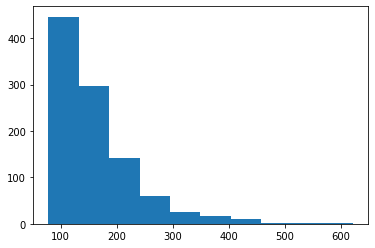

In [90]:
# Set the x limits, and the number of points, and calculate the interval
xl = -4.0
xh = 4.0
npoints = 1000

dx = (xh-xl)/npoints

par = np.array([1.80,-4.05,0.4,1.0])

nstat = []

for i in range(1000):
    n,xroots,yroots = find_roots(1.0,3)
    nstat.append(n)
    
counts, bins = np.histogram(nstat)
plt.hist(bins[:-1], bins, weights=counts)

nstat = np.array(nstat)

print (nstat.mean(),nstat.mean()/npoints)